In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Reports/50_Startups.csv")

In [2]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [3]:
# df.isnull()

In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

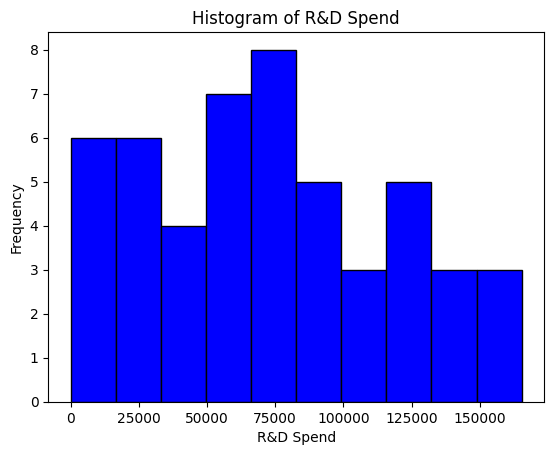

In [5]:
plt.hist(df["R&D Spend"], bins=10, color="blue", edgecolor="black")
plt.xlabel("R&D Spend")
plt.ylabel("Frequency")
plt.title("Histogram of R&D Spend")
plt.show()

In [6]:
x = df.drop(columns=["Profit"])
y = df["Profit"]

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [8]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

reg = DecisionTreeRegressor(
    criterion="squared_error",
    random_state=0,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
)

In [9]:
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                      random_state=0)

In [10]:
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)

Mean Squared Error:


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(
    " Mean Squared error for testing data: ",
    mean_squared_error(y_test, y_pred_test),
)
print(
    " Mean Squared error for training data: ",
    mean_squared_error(y_train, y_pred_train),
)

 Mean Squared error for testing data:  90626679.86925
 Mean Squared error for training data:  27694092.902396183


Root Mean Squared Error:


In [12]:
print(
    "Root Mean Squared error for testing data: ",
    np.sqrt(mean_squared_error(y_test, y_pred_test)),
)
print(
    "Root Mean Squared error for training data: ",
    np.sqrt(mean_squared_error(y_train, y_pred_train)),
)

Root Mean Squared error for testing data:  9519.804612976572
Root Mean Squared error for training data:  5262.51773416453


MAE:


In [13]:
from sklearn.metrics import mean_absolute_error

print(
    "mean absolute error for testing data: ", mean_absolute_error(y_test, y_pred_test)
)
print(
    "mean absolute error for training data",
    mean_absolute_error(y_train, y_pred_train),
)

mean absolute error for testing data:  7078.264666666667
mean absolute error for training data 3982.772380952379


R2 Score:


In [14]:
r2_score_test = r2_score(y_test, y_pred_test)
print("R2 Score of test data: ", r2_score_test)
r2_score_train = r2_score(y_train, y_pred_train)
print("R2 Score of train data: ", r2_score_train)

R2 Score of test data:  0.9061104003960261
R2 Score of train data:  0.9850310104232607


Adjusted R2 Score:


In [15]:
adj_r2_test = 1 - (
    (1 - r2_score(y_test, y_pred_test))
    * (len(x_test) - 1)
    / (len(x_test) - x_test.shape[1] - 1)
)
print("Adjusted R2 Score of test data: ", adj_r2_test)
adj_r2_train = 1 - (
    (1 - r2_score(y_train, y_pred_train))
    * (len(x_train) - 1)
    / (len(x_train) - x_train.shape[1] - 1)
)
print("Adjusted R2 Score of train data: ", adj_r2_train)

Adjusted R2 Score of test data:  0.8805041459585786
Adjusted R2 Score of train data:  0.9835823985287375


In [16]:
score = reg.score(x_test, y_test)
print(score)

0.9061104003960261


Cross Validation-dividing the data into multiple subsets and testing witht themselves && cv determines the number of subgroups


In [17]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(reg, x_train, y_train, cv=5)
print("Cross-validation scores:", cv_score)
print("Mean cross-validation score:", np.mean(cv_score))

Cross-validation scores: [0.78198134 0.78348595 0.90823949 0.58372385 0.95432364]
Mean cross-validation score: 0.8023508533926564


Importrance of each features:


In [18]:
feature_importances = reg.feature_importances_
features = x.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

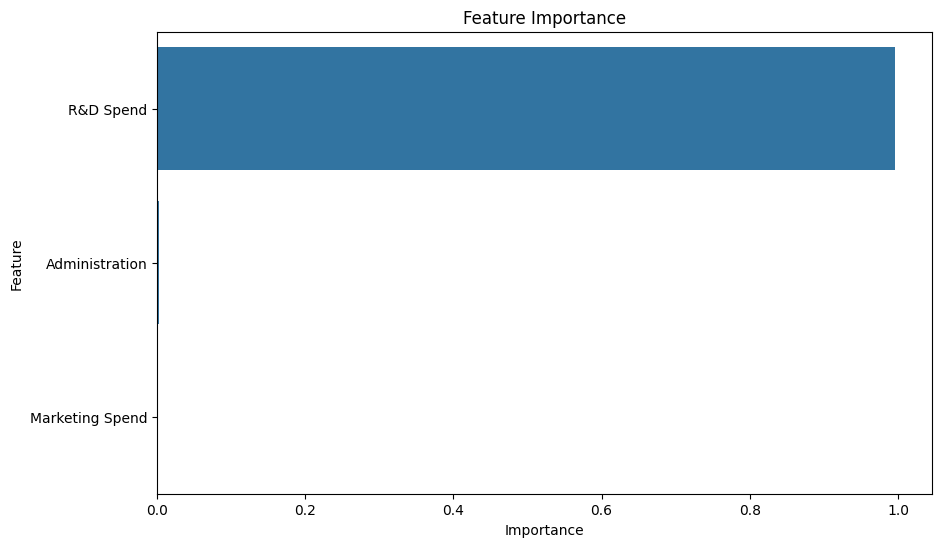

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.show()

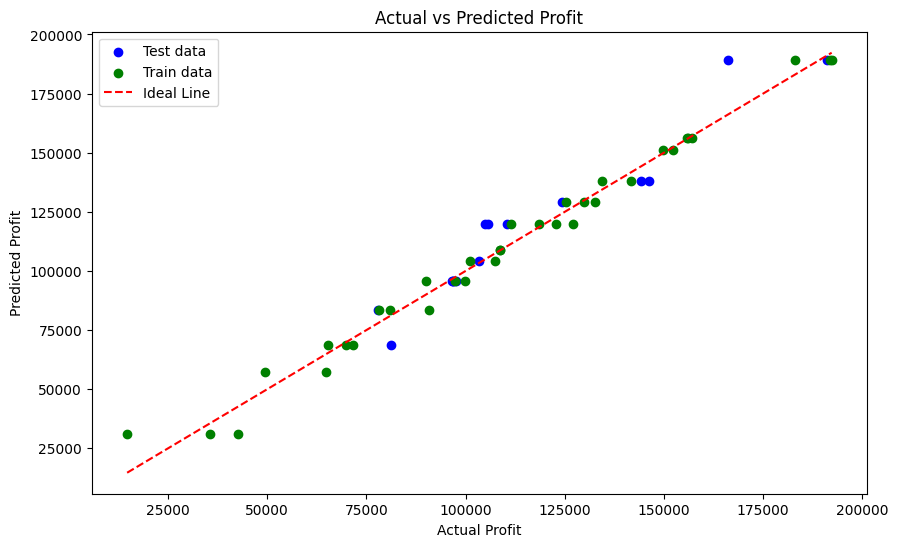

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color="blue", label="Test data")
plt.scatter(y_train, y_pred_train, color="green", label="Train data")

# Adding the ideal line where predicted values equal actual values
min_val = min(min(y_test), min(y_train))
max_val = max(max(y_test), max(y_train))
plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    color="red",
    linestyle="--",
    label="Ideal Line",
)

plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.legend()
plt.show()

In [21]:
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

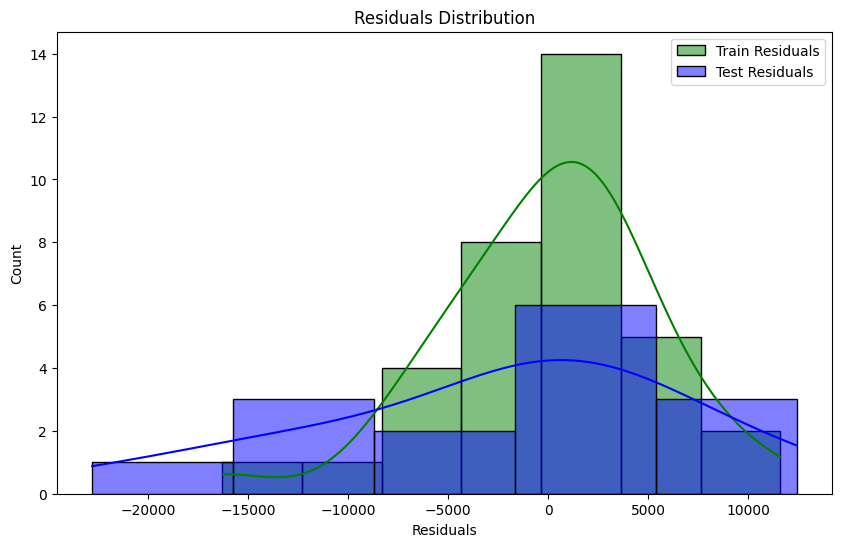

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_train, kde=True, color="green", label="Train Residuals")
sns.histplot(residuals_test, kde=True, color="blue", label="Test Residuals")
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.legend()
plt.show()

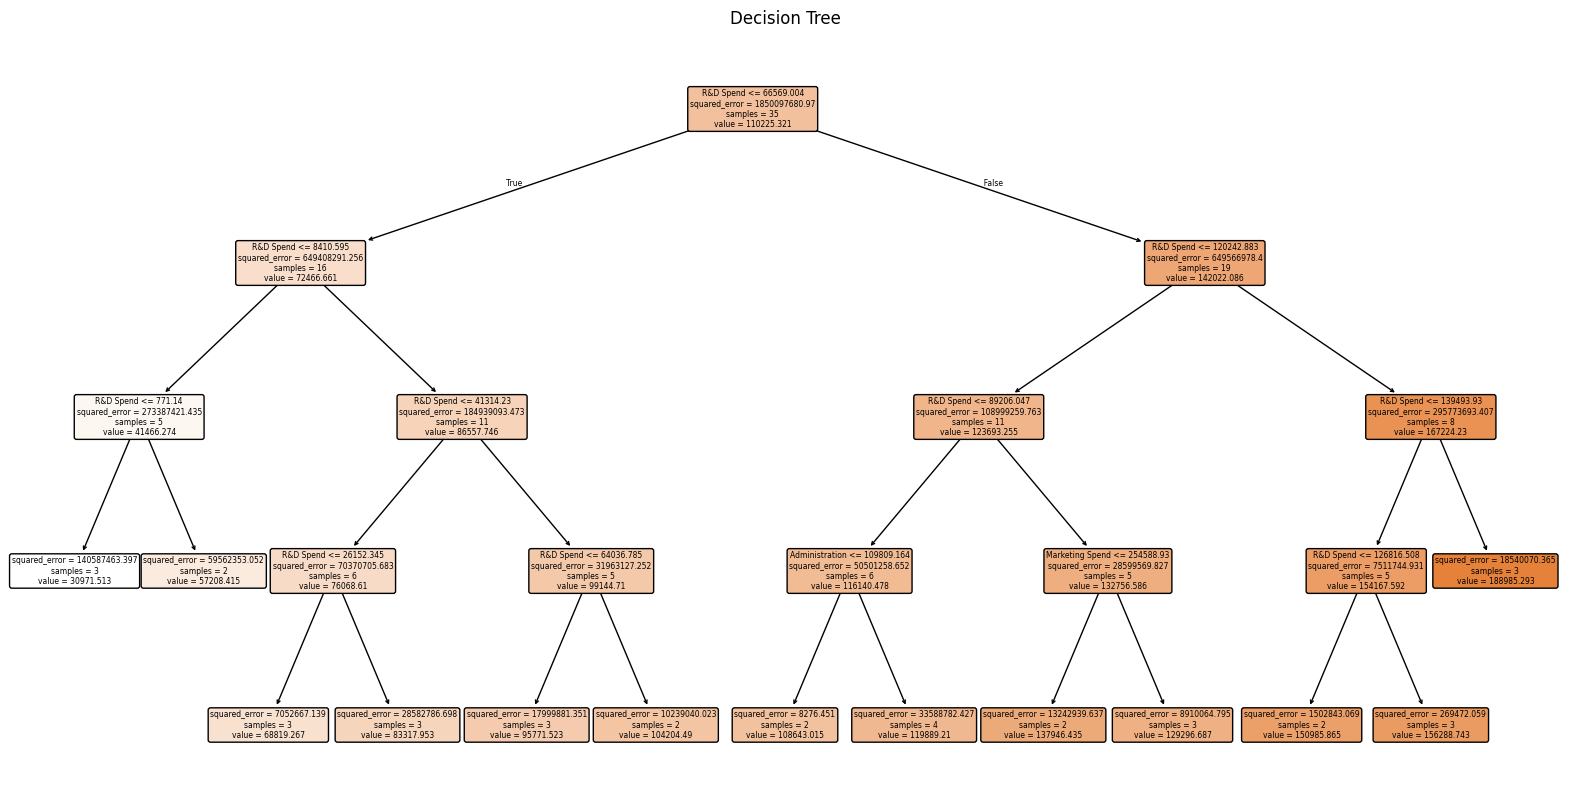

In [23]:
plt.figure(figsize=(20, 10))
plot_tree(reg, feature_names=x.columns, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()